In [157]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import auc,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

In [10]:
#Load Datasets
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")
SampleSubmission = pd.read_csv('SampleSubmission.csv')
VariableDefinition = pd.read_csv("VariableDefinitions.csv")

In [5]:
Train.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high inc...,4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [6]:
Test.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,...,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,...,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,...,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,...,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,32.0,1,1.0,1.0,2.0,2.0,...,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [12]:
VariableDefinition

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, E...",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or ...,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [15]:
print(f"The size of the training dataset is {Train.shape} and the test is {Test.shape}")

The size of the training dataset is (104867, 36) and the test is (44943, 35)


# Checking for Missing values

Text(0.5, 1.0, 'Percentage of missing Values in the Train dataset')

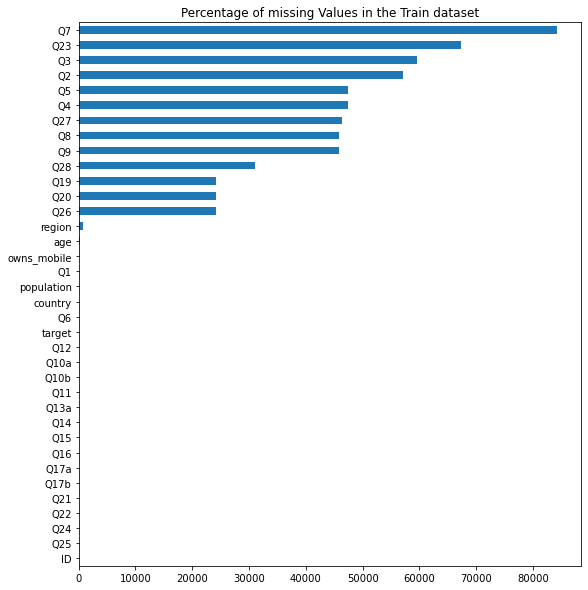

In [18]:
ax = Train.isna().sum().sort_values().plot(kind='barh',figsize =(9,10))
plt.title('Percentage of missing Values in the Train dataset')

Text(0.5, 1.0, 'Missing values in the Test data')

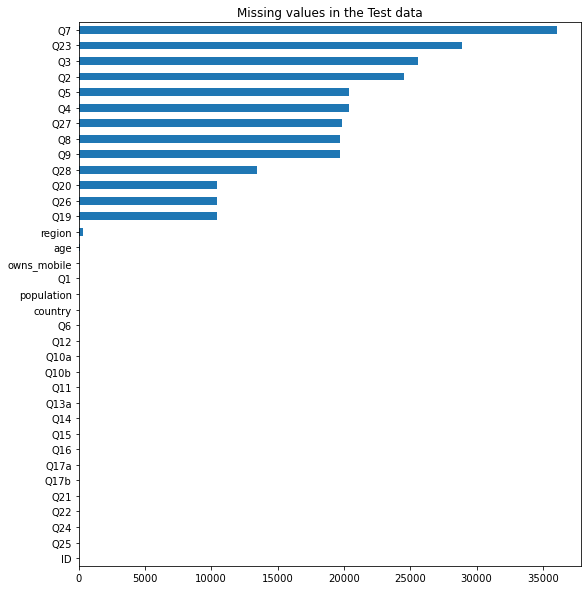

In [20]:
#check for missing values in the test data
ax = Test.isna().sum().sort_values().plot(kind='barh',figsize=(9,10))
plt.title('Missing values in the Test data')

In [26]:
#check for duplicates in train,test
Train.duplicated().any(),Test.duplicated().any()

(False, False)

/Users/julioboss/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Variable Distribution')

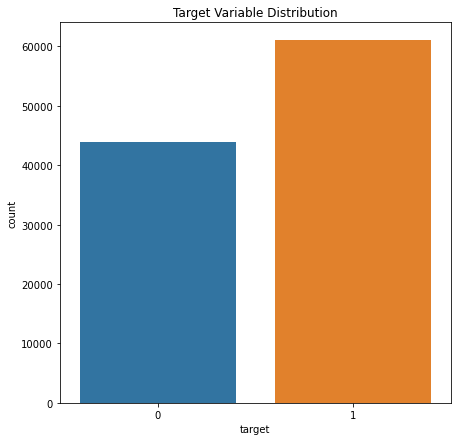

In [31]:
#Distribution the target variable
plt.figure(figsize=(7,7))
sns.countplot(Train.target)
plt.title('Target Variable Distribution')

*From the above plot we can see that the majority class can make payments even in emergency*

/Users/julioboss/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Q8 - Has Deposited any Monet to the Bank in the Last 12 Months')

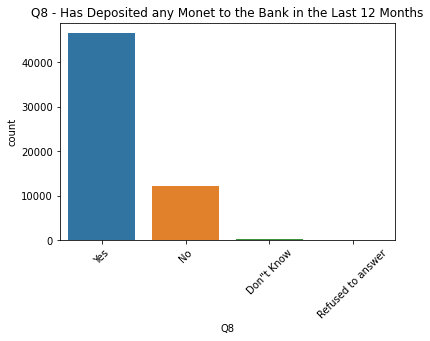

In [35]:
#Q8 - Has deposited money in the last 12 months
ax = sns.countplot(Train.Q8)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'],rotation=45)
plt.title('Q8 - Has Deposited any Monet to the Bank in the Last 12 Months')

*This shows majority made deposit in the last 12 months*

# Combine Train and Test Data for easy preprocessing

In [38]:
#Combine the test and the trainging data set
datalength = Train.shape[0]

all_data = pd.concat((Train,Test)).reset_index(drop=True)
print(f"The New data set contains {all_data.shape}")

The New data set contains (149810, 36)


In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q2           68137 non-null   float64
 7   Q3           64562 non-null   float64
 8   Q4           82004 non-null   float64
 9   Q5           82004 non-null   float64
 10  Q6           149810 non-null  int64  
 11  Q7           29515 non-null   float64
 12  Q8           84272 non-null   float64
 13  Q9           84272 non-null   float64
 14  Q10a         149810 non-null  int64  
 15  Q10b         149810 non-null  int64  
 16  Q11          149810 non-null  int64  
 17  Q12          149810 non-null  int64  
 18  Q13a         149810 non-

In [42]:
#Categorical columns
cat_cols = ['country','region','owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
#Numerical columns
num_cols = ['population','age']

In [46]:
#change the data type to category
all_data[cat_cols] = all_data[cat_cols].astype('category')

In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q2           68137 non-null   category
 7   Q3           64562 non-null   category
 8   Q4           82004 non-null   category
 9   Q5           82004 non-null   category
 10  Q6           149810 non-null  category
 11  Q7           29515 non-null   category
 12  Q8           84272 non-null   category
 13  Q9           84272 non-null   category
 14  Q10a         149810 non-null  category
 15  Q10b         149810 non-null  category
 16  Q11          149810 non-null  category
 17  Q12          149810 non-null  category
 18  Q13a

# Unique values per column 

In [47]:
for col in cat_cols:
    print(col,all_data[col].nunique())

country 144
region 8
owns_mobile 4
Q1 4
Q2 4
Q3 4
Q4 4
Q5 4
Q6 4
Q7 4
Q8 4
Q9 4
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 4
Q20 4
Q21 4
Q22 4
Q23 4
Q24 4
Q25 4
Q26 4
Q27 4
Q28 4


# Filling in the missing Values

In [51]:
all_data[col].mode()[0]

1.0

In [55]:
for col in all_data.columns:
    if col in cat_cols:
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    elif col in num_cols:
        all_data[col] = all_data[col].fillna(all_data[col].fillna(9999))
        
        
#confirm that there arent any missing values in the columns aside the target variable
all_data[all_data.columns.difference(['target'])].isna().sum().any()

False

In [56]:
all_data.shape

(149810, 36)

# Feature Engineering


In [57]:
all_data = pd.get_dummies(data=all_data,columns=cat_cols)
all_data.head()

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,ID_0000020532,25550170.0,66.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [58]:
all_data.shape

(149810, 276)

In [59]:
TrainDf= all_data[:datalength]
TestDf = all_data[datalength:]

In [60]:
TestDf

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
104867,ID_0000005111,3.557444e+06,62.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
104868,ID_0000389416,1.292017e+07,32.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
104869,ID_0000634789,3.791520e+06,73.0,NaN,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
104870,ID_0000778100,1.105668e+08,67.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
104871,ID_0001123210,2.555017e+07,32.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149805,ID_9998436223,1.731874e+06,60.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
149806,ID_9998690942,7.492988e+06,59.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
149807,ID_9999258746,4.591023e+06,25.0,NaN,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
149808,ID_9999427887,1.461474e+07,66.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Training an making predictions

In [66]:
# Removing th ID and The Target columns
main_cols = all_data.columns.difference(['ID','target'])
X = TrainDf[main_cols]
Y = TrainDf.target.astype(int)



#Split data into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [266]:
#Train Model
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [264]:
# Make predictions
Y_pred = model.predict_proba(X_test)[:,1]

In [265]:
#Check the auc score of the model
print(f"AUC Score of RandomForest on X_test is {roc_auc_score(Y_test,Y_pred)}\n")

AUC Score of RandomForest on X_test is 0.7593633820055441



In [75]:
#Print classification report
print(classification_report(Y_test,[1 if x >= 0.5 else 0 for x in Y_pred]))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62     12994
           1       0.73      0.79      0.76     18467

    accuracy                           0.70     31461
   macro avg       0.69      0.68      0.69     31461
weighted avg       0.70      0.70      0.70     31461



In [78]:
TestDf = TestDf[main_cols]
predictions = model.predict_proba(TestDf)[:,1]

In [79]:
#Create a submissions file
sub_file = SampleSubmission.copy()
sub_file.target = predictions

In [81]:
sub_file.to_csv("UmojaSubmission.csv",index=False)

In [82]:
sub_file.head()

,ID,target
0,ID_0000005111,0.910000
1,ID_0000389416,0.170000
2,ID_0000634789,0.410000
3,ID_0000778100,0.990000
4,ID_0001123210,0.633333


In [85]:
#Using DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [91]:
prediction2 = model2.predict(X_test)

In [92]:
prediction2

array([0.5, 0. , 0. , ..., 0. , 0. , 1. ])

In [95]:
#Check the auc score of the model
print(f"AUC Score of RandomForest on X_test is {roc_auc_score(Y_test,prediction2)}\n")

AUC Score of RandomForest on X_test is 0.6363373166578234



In [96]:
#Print classification report
print(classification_report(Y_test,[1 if x >= 0.5 else 0 for x in prediction2]))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56     12994
           1       0.69      0.70      0.70     18467

    accuracy                           0.64     31461
   macro avg       0.63      0.63      0.63     31461
weighted avg       0.64      0.64      0.64     31461



In [112]:
TestDf = TestDf[main_cols]
prediction3 = model2.predict(TestDf)

In [100]:
#Create a submissions file
sub_file = SampleSubmission.copy()
sub_file.target = predictions

In [101]:
#Save to file
sub_file.to_csv("UmojaSubmission2.csv",index=False)

In [103]:
sub_file

,ID,target
0,ID_0000005111,0.0
1,ID_0000389416,0.0
2,ID_0000634789,0.0
3,ID_0000778100,1.0
4,ID_0001123210,1.0
...,...,...
44938,ID_9998436223,1.0
44939,ID_9998690942,1.0
44940,ID_9999258746,1.0
44941,ID_9999427887,0.0


In [346]:
#Using LGBMClassifier

model4 = LGBMClassifier(num_leaves=62,max_depth=15,random_state=1)
model4.fit(X_train.values,Y_train.values)

LGBMClassifier(max_depth=15, num_leaves=62, random_state=1)

In [351]:
prediction4 = model4.predict_proba(X_test)[:,1]

In [352]:
# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(Y_test, prediction4)}\n')

# print classification report
print(classification_report(Y_test, [1 if x >= 0.5 else 0 for x in prediction4]))

LGBM AUC score on the X_test is: 0.7982066488376542

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     12994
           1       0.76      0.78      0.77     18467

    accuracy                           0.73     31461
   macro avg       0.72      0.72      0.72     31461
weighted avg       0.73      0.73      0.73     31461



In [353]:
TestDf = TestDf[main_cols]
prediction4 = model4.predict_proba(TestDf)[:,1]

In [354]:
# Create a submission file
sub_file4 = SampleSubmission.copy()
sub_file4.target = prediction4

In [355]:
sub_file4.to_csv("UmojaSubmission08.csv",index=False)

In [246]:
sub_file4.head()

,ID,target
0,ID_0000005111,0.877224
1,ID_0000389416,0.308708
2,ID_0000634789,0.483429
3,ID_0000778100,0.970453
4,ID_0001123210,0.598931


Text(0.5, 1.0, 'Distribution of the Target Variable')

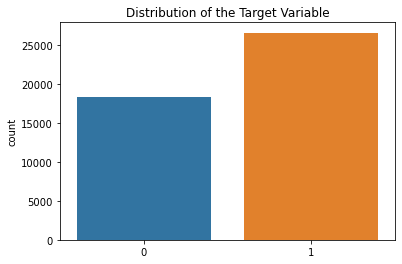

In [247]:
sns.countplot([1 if x>= 0.5 else 0 for x in sub_file4.target])
plt.title('Distribution of the Target Variable')

In [308]:
#Using the GradientBoostingRegressor

model5 =xgb.XGBRegressor(max_depth=4)
model5.fit(X_train,Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [309]:
prediction5 = model5.predict(X_test)

In [310]:
# Check the auc score of the model
print(f'GradientBoost AUC score on the X_test is: {roc_auc_score(Y_test, prediction5)}\n')

# print classification report
print(classification_report(Y_test, [1 if x >= 0.5 else 0 for x in prediction5]))

GradientBoost AUC score on the X_test is: 0.7931495226554197

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     12994
           1       0.76      0.77      0.77     18467

    accuracy                           0.72     31461
   macro avg       0.71      0.71      0.71     31461
weighted avg       0.72      0.72      0.72     31461



In [311]:
#Using GradientBooster on TestDf
prediction5 = model5.predict(TestDf)

In [312]:
# Create a submission file
sub_file5 = SampleSubmission.copy()
sub_file5.target = prediction5
sub_file5.head()

,ID,target
0,ID_0000005111,0.786855
1,ID_0000389416,0.266234
2,ID_0000634789,0.448999
3,ID_0000778100,0.993450
4,ID_0001123210,0.567322


In [313]:
#Saving to csv File
sub_file5.to_csv('Umojasubmission7.csv',index=False)